In [6]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [7]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [95]:
def spectrum_width(table):
    x = list(table['Частота'])  
    y = list(table['Канал A'])
    #x = np.array([a for (a, b) in zip(x0, y0) if b > 0.015])  
    #y = np.array([a for a in y0 if a > 0.015])
    
    a = list(zip(y, x))
    b = list(zip(y[500:], x[500:]))
    
    a.sort()
    b.sort()
    
    a = a.pop()
    b = b.pop()
    
    return b[1] - a[1]

In [9]:
# Начальное состояние
begin_state = open_csv('BeginState.csv')
freqX2 = open_csv('FrequencyX2.csv')
timeX2 = open_csv('TimeX2.csv')

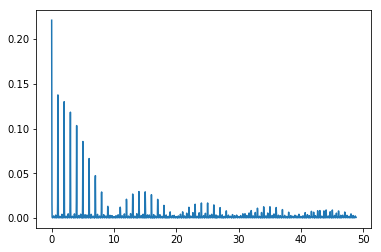

In [10]:
# Строим график
x = np.array(begin_state['Частота'])  
y = np.array(begin_state['Канал A'])
plt.plot(x,y)
plt.show()

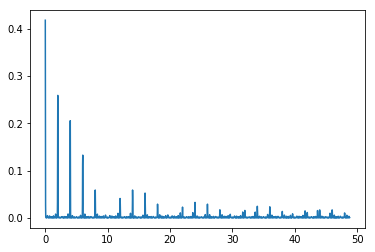

In [11]:
# Строим график
x = np.array(freqX2['Частота'])  
y = np.array(freqX2['Канал A'])
plt.plot(x,y)
plt.show()

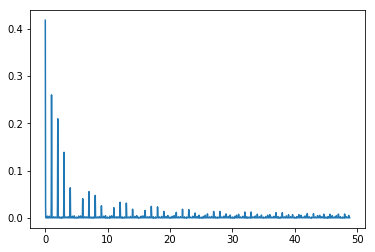

In [67]:
# Строим график
x = np.array(timeX2['Частота'])  
y = np.array(timeX2['Канал A'])
plt.plot(x, y)
plt.show()

In [132]:
#8 пункт
s = 40
frequency = list()
t = list()
while s <= 200:
    current = open_csv('point_8/{}us.csv'.format(s))
    frequency.append(spectrum_width(current))
    t.append(s)
    s = s + 20
table = {r"$\tau, \mu s$": pd.Series(t), r"$\Delta\nu$, kGz": pd.Series(frequency)}
table = pd.DataFrame(table)
table

,"$\tau, \mu s$","$\Delta\nu$, kGz"
0,40,11.992455
1,60,11.992455
2,80,18.000603
3,100,13.995171
4,120,11.992455
5,140,11.992455
6,160,14.996529
7,180,13.995171
8,200,11.992455
